In [1]:
import requests
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## some useful staffs

In [2]:
url_base = 'http://165.227.157.145:8080'

#### this function allow us to download and save data in some range

In [3]:
def download_data(x_list,name='mlkiwi.csv'):
    y = []
    index = 0
    for x in x_list:
        url = url_base + '/api/do_measurement?x='+ str(x)
        r = requests.get(url)
        response = json.loads(r.text)
        y.append(response['data']['y'])
    return np.array(y,dtype=np.float)

#### this function allow us to aproximate function to some polynome and visualize it

In [4]:
def aproximate(x,y, degree = None, z = None):
    if(z is None):
        if(degree is None):
            raise ValueError('degree is not defined')
        z = np.polyfit(x, y, degree)
    pf = np.poly1d(z)
    p = pf(x)
    var = np.amax(p - y)
    plt.plot(x, y, '-', x, p, '-', x, p + var, '--', x, p - var, '--')
    return z

## first we have to download some data. just heuristic. from -10 to 10 with step 0.5.

In [5]:
x = np.arange(-10,10,0.5)
y = download_data(x)

### lets try to visualize

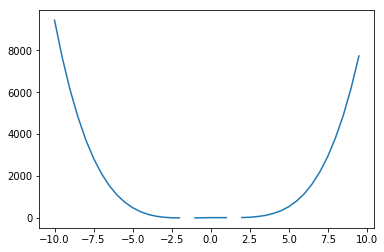

In [6]:
plt.plot(x, y)

### looks like parabola, but we see some breaks on the vertex. probably it is kind of polynome. lets try to scale it

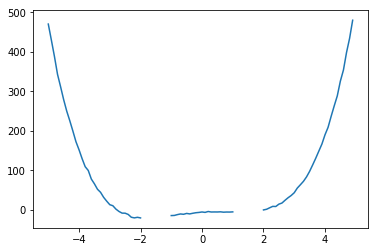

In [7]:
x = np.arange(-5,5,0.1)
y = download_data(x)
plt.plot(x, y)

### ingore breaks and try to aproximate

In [8]:
idx = np.isfinite(x) & np.isfinite(y)

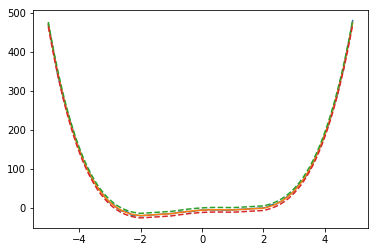

In [9]:
z = aproximate(x[idx],y[idx],4)

### perfect... we see the 4-order polynomial function

### check given parts

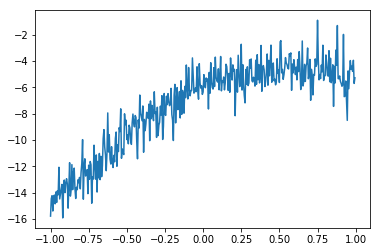

In [10]:
x = np.arange(-1,1,0.005)
y = download_data(x)
plt.plot(x, y)

### try to use our pre-defined function

array([  1.00655712e+00,   4.46223220e-03,  -5.12327115e+00,
         4.76443642e+00,  -5.78109348e+00])

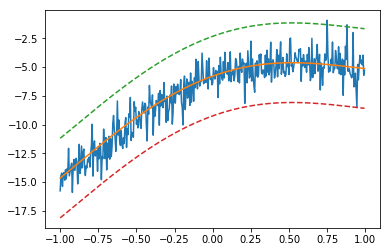

In [11]:
aproximate(x,y,z=z)

### nice, it is looks like our function diluted with some random noise. green and red lines show the max and min of random values

### lets try other parts

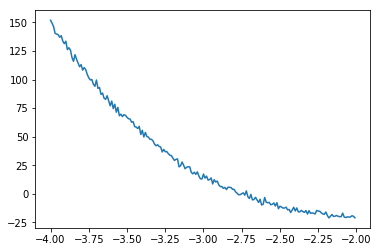

In [12]:
x = np.arange(-4,-2,0.01)
y = download_data(x)
plt.plot(x, y)

array([  1.00655712e+00,   4.46223220e-03,  -5.12327115e+00,
         4.76443642e+00,  -5.78109348e+00])

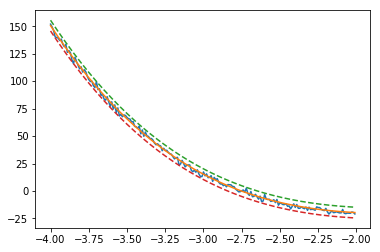

In [13]:
aproximate(x,y,z=z)

array([  1.00655712e+00,   4.46223220e-03,  -5.12327115e+00,
         4.76443642e+00,  -5.78109348e+00])

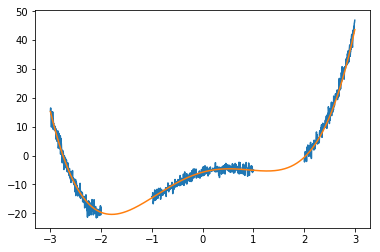

In [14]:
x = np.arange(-3,3,0.005)
y = download_data(x)
aproximate(x,y,z=z)

### lets round array

In [15]:
z2 = np.around(z)

array([ 1.,  0., -5.,  5., -6.])

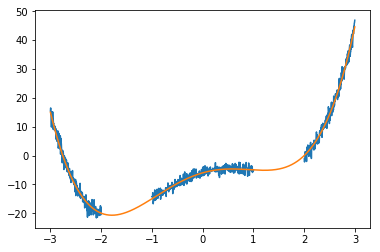

In [16]:
aproximate(x,y,z=z2)

#### perfect, now lets define the function
$$
y=x^4-5x^2+5x-6
$$

#### but now we should define breaks in the function. break may be cause of 3 things:
* division by zero
* square root of a negative number
* ln of a negative number

#### best suiting option is square root and lets try to find it.

#### first of all we can defind break points:
$$[-2, -1, 1, 2]$$
#### so the breaking function looks like this:
$$
y_{br}=\sqrt{(2-x)(1-x)(1+x)(2+x)}
$$

#### lets concat functions:
$$
y = x^4 - 5x^2 + 5x- 6 + \sqrt{(4-x^2)(1-x^2)}
$$

### lets test it


In [17]:
def f(x):
    return np.power(x,4) - 5*np.power(x,2) + 5*x - 6

In [18]:
def f_br(x):
    return np.sqrt((4-np.power(x,2))*(1-np.power(x,2)))

In [19]:
yf = f(x) + f_br(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


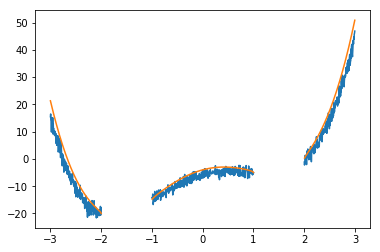

In [20]:
plt.plot(x, y, '-', x, yf, '-')

### looks like our breaking function shift whole function a bit. lets try to fix it

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


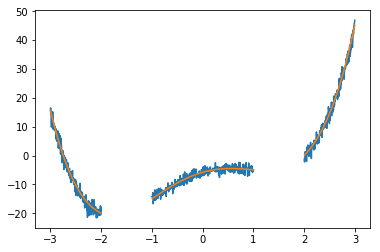

In [26]:
yf = f(x) + f_br(x)*0.1 # devide break function
plt.plot(x, y, '-', x, yf, '-')
idx = np.isfinite(y) & np.isfinite(yf)
random_vary = np.amax(yf[idx] - y[idx])

In [27]:
random_vary

5.0565780764776918

### perfect

### the result looks like this 
$$
y = x^4 - 5x^2 + 5x- 6 + \frac{\sqrt{(4-x^2)(1-x^2)}}{10} + R(5), \text{where R is random function}
$$